In [249]:
!pip install underthesea
!pip install transformers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# library

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from underthesea import word_tokenize
from underthesea import text_normalize
from transformers import pipeline
from transformers import AutoTokenizer, AutoModel 
import torch
from sklearn.cluster import KMeans
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from wordcloud import WordCloud
import matplotlib.dates as mdates

# read data

In [251]:
df=pd.read_csv('/kaggle/input/feeback-hasaki/feedback.csv')
df.head()

,id,id-customer,feedback,date,time,number-of-stars,id-product
0,1,443,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,17:06,5,308500015
1,2,1030,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,15:04,5,308500015
2,3,689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594
3,4,2519,"Sản phẩm có khả năng làm sạch tốt. Lớp trang điểm trên da, mắt và môi nhanh chóng bị loại bỏ. Chỉ cần lau qua bằng một miếng bông tẩy trang là toàn bộ bụi bẩn, dầu thừa và lớp make-up đã được lấy đi. Vì thế, dùng cực kỳ tiết kiệm. Thêm nữa, em này cũng phù hợp cho da đang bị kích ứng. Bởi sản phẩm không chỉ làm sạch da mà còn làm dịu, giúp giảm tình trạng ngứa ngáy, khó chịu.",17/07/2022,13:48,5,204100075
4,5,402,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,23:04,5,422208977


In [252]:
df.shape

(21575, 7)

In [253]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# clean data

## drop nan and duplicates

In [254]:
df.dropna()

,id,id-customer,feedback,date,time,number-of-stars,id-product
0,1,443,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,17:06,5,308500015
1,2,1030,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,15:04,5,308500015
2,3,689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594
3,4,2519,"Sản phẩm có khả năng làm sạch tốt. Lớp trang điểm trên da, mắt và môi nhanh chóng bị loại bỏ. Chỉ cần lau qua bằng một miếng bông tẩy trang là toàn bộ bụi bẩn, dầu thừa và lớp make-up đã được lấy đi. Vì thế, dùng cực kỳ tiết kiệm. Thêm nữa, em này cũng phù hợp cho da đang bị kích ứng. Bởi sản phẩm không chỉ làm sạch da mà còn làm dịu, giúp giảm tình trạng ngứa ngáy, khó chịu.",17/07/2022,13:48,5,204100075
4,5,402,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,23:04,5,422208977
...,...,...,...,...,...,...,...
21570,21571,1158,"Dùng sp này bị ghiền luôn, hạt siêu mịn, mùi thơm dễ chịu, da sạch hơn sau khi dùng.",6/8/2024,7:39,5,422206043
21571,21572,760,"Mua nhiều lần ở đây rồi ạ. Sản phẩm ok, giá rẻ ship nhanh nữa chớ ❤️❤️❤️",17/02/2022,22:49,5,100230057
21572,21573,2248,"Sản phẩm có một số hạn chế, không thực sự ưng ý.",5/12/2023,22:10,2,422201504
21573,21574,2886,"dùng kem này từ 2 năm trước, kem sáng da trắng da ok, rất ưng ý",27/01/2021,10:06,5,358300001


In [255]:
df.drop_duplicates()

,id,id-customer,feedback,date,time,number-of-stars,id-product
0,1,443,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,17:06,5,308500015
1,2,1030,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,15:04,5,308500015
2,3,689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594
3,4,2519,"Sản phẩm có khả năng làm sạch tốt. Lớp trang điểm trên da, mắt và môi nhanh chóng bị loại bỏ. Chỉ cần lau qua bằng một miếng bông tẩy trang là toàn bộ bụi bẩn, dầu thừa và lớp make-up đã được lấy đi. Vì thế, dùng cực kỳ tiết kiệm. Thêm nữa, em này cũng phù hợp cho da đang bị kích ứng. Bởi sản phẩm không chỉ làm sạch da mà còn làm dịu, giúp giảm tình trạng ngứa ngáy, khó chịu.",17/07/2022,13:48,5,204100075
4,5,402,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,23:04,5,422208977
...,...,...,...,...,...,...,...
21570,21571,1158,"Dùng sp này bị ghiền luôn, hạt siêu mịn, mùi thơm dễ chịu, da sạch hơn sau khi dùng.",6/8/2024,7:39,5,422206043
21571,21572,760,"Mua nhiều lần ở đây rồi ạ. Sản phẩm ok, giá rẻ ship nhanh nữa chớ ❤️❤️❤️",17/02/2022,22:49,5,100230057
21572,21573,2248,"Sản phẩm có một số hạn chế, không thực sự ưng ý.",5/12/2023,22:10,2,422201504
21573,21574,2886,"dùng kem này từ 2 năm trước, kem sáng da trắng da ok, rất ưng ý",27/01/2021,10:06,5,358300001


## Standardization of Vietnamese code tables (to utf-8)
    - Normalize the data because if the customer uses the composed Unicode format while the data crawler uses Unikey with precomposed Unicode (or vice versa), it can easily lead to confusion between the two encoding types, resulting in data imbalance and making data processing difficult.

In [256]:
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

In [257]:
dicchar = loaddicchar()
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [258]:
df['feedback']=df['feedback'].apply(lambda x: covert_unicode(str(x)))

## convert text to lower

In [259]:
def convert_lower(x):
    x.lower()
    return x

In [260]:
df['feedback']=df['feedback'].apply(lambda x: convert_lower(str(x)))

##  remove special character
- example: "hi em, cho anh làm quen nho !@##$" -> 'hi em, cho anh làm quen nho '

In [261]:
def remove_character(x):
    x=x.lower()
    reg=r'[a-zA-Zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ,\. ]+'
    y=re.findall(reg,x)
    x=' '.join(y)
    return x

In [262]:
x='hi em, cho anh làm quen nho @#$%%'
remove_character(x)

'hi em, cho anh làm quen nho '

In [263]:
df['feedback']=df['feedback'].apply(lambda x: remove_character(x))

## covert number to text
    - example : 6 -> sáu

In [264]:
number = pd.DataFrame({
    "number": ["0", "1", "2", "3", "4"],
    "text": ["không", "một", "hai", "ba", "bốn"]
})

def number_text_from_df(text, df):
    result = ""
    for char in text:
        if char.isdigit():
            text_value = df.loc[df['number'] == char, 'text'].values
            if len(text_value) > 0:
                result += text_value[0] + " "
            else:
                result += char + " "
        else:
            result += char

    return result.strip()

In [265]:
x = "201 1"
print(number_text_from_df(x, number))

hai không một  một


## remove stopword

In [266]:
stop_word=pd.read_csv('/kaggle/input/hasaki-feedback/vietnamese-stopwords.txt',header=None, encoding="utf-8")
stop_word.head()

,0
0,a lô
1,a ha
2,ai
3,ai ai
4,ai nấy


In [267]:
def remove_stopword(x,y):
    x = [word for word in x if word not in y]
    x=''.join(x)
    return x

In [268]:
df['feedback']=df['feedback'].apply(lambda x: remove_stopword(str(x),stop_word))

## replace character duplicate
    - example: "xinhhhhhhh" -> "xinh"

In [269]:
def remove_dup(x):
    return re.sub(r'(.)\1+', r'\1', x)

In [270]:
x="xinhhhh, aaaaabbb"
remove_dup(x)

'xinh, ab'

In [271]:
df['feedback']=df['feedback'].apply(lambda x: remove_dup(x))

# reomve emoji and Make sure there are spaces before and after any periods and commas
    - example : "anh yêu em lắm ❤️❤️❤️❤️" -> "anh yêu em"
    - example : "anh yêu em,nhưng anh cũng yêu nhỏ đó" -> "anh yêu em , nhưng anh cũng yêu nhỏ đó"

In [272]:
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"
                u"\U0001F300-\U0001F5FF" 
                u"\U0001F680-\U0001F6FF"  
                u"\U0001F1E0-\U0001F1FF"  
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)

In [273]:
emoji_pattern

re.compile(r'[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿✂-➰Ⓜ-🉑🤦-🤷𐀀-\U0010ffff\u200d♀-♂☀-⭕⏏⏩⌚〰️]+',
           re.UNICODE)

In [274]:
def clean_text(text):
    text = re.sub(emoji_pattern, " ", text) # remove emojis
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])\s*(\w)", r"\1 \2 \3", text)
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])", r"\1 \2", text)
    text = re.sub(f"([{string.punctuation}])([{string.punctuation}])+",r"\1", text) # reduce consecutive punctuation
    text = text.strip()
    while text.endswith(tuple(string.punctuation+string.whitespace)):
        text = text[:-1]
    while text.startswith(tuple(string.punctuation+string.whitespace)):
        text = text[1:]   
    text = text.translate(str.maketrans('', '', string.punctuation))
        
    text = re.sub(r"\s+", " ", text) 
    
    text = text_normalize(text) # make sure punctunation is in the right letter (Vietnamese case)
    text = word_tokenize(text, format="text") # tokenize the cleaned text
    return text

In [275]:
df['feedback']=df['feedback'].apply(lambda x: clean_text(x))

In [276]:
df.head(5)

,id,id-customer,feedback,date,time,number-of-stars,id-product
0,1,443,sử_dụng dễ_dàng rất thoải_mái thư_giãn tột_độ,29/04/2023,17:06,5,308500015
1,2,1030,sử_dụng dễ dãng rất thoải_mái thư_giãn tột_độ,30/04/2023,15:04,5,308500015
2,3,689,mình rất thích hasaki va_sp tẩy_trang này,30/04/2023,18:34,5,422216594
3,4,2519,sản_phẩm có khả_năng làm sạch tốt lớp trang_điểm trên da_mắt và môi nhanh_chóng bị loại_bỏ chỉ cần lau qua bằng một miếng bông tẩy_trang là toàn_bộ bụi bẩn dầu_thừa và lớp make up đã được lấy đi vì_thế dùng cực_kỳ tiết_kiệm thêm nữa em này cũng phù_hợp cho da đang bị kích_ứng bởi sản_phẩm không_chỉ làm sạch da mà_còn làm dịu giúp giảm tình_trạng ngứa_ngáy khó_chịu,17/07/2022,13:48,5,204100075
4,5,402,sữa rửa mặt tốt sạch mụn mịn da_đáng mua nha,15/04/2023,23:04,5,422208977


#  now i will creat column label by 2 ways
## the first way is based on the number of stars that the customer has reviewed

In [277]:
df['number-of-stars'].value_counts().sort_index()

number-of-stars
0        2
1      551
2      508
3      986
4     2244
5    17284
Name: count, dtype: int64

In [278]:
def add_column_star(x):
    if x < 2:
        x= 0
    elif x > 1 and x <=3:
        x=2
    else:
        x=1
    return x

In [279]:
df['label-star']=df['number-of-stars'].apply(lambda x: add_column_star((x)))

In [280]:
df['label-star'].value_counts()

label-star
1    19528
2     1494
0      553
Name: count, dtype: int64

## the second  way use model 5CD-AI

In [281]:
model_name = "5CD-AI/Vietnamese-Sentiment-visobert"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

In [282]:
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)  
        logits = outputs.logits  
        probabilities = torch.nn.functional.softmax(logits, dim=-1) 
        predicted_label = torch.argmax(probabilities, dim=-1).item() 
    return predicted_label

In [283]:
df['label_model'] = df['feedback'].apply(predict_sentiment)

In [284]:
df['label_model'].value_counts()

label_model
1    17676
0     3248
2      651
Name: count, dtype: int64

In [285]:
print(model.config.id2label)

{0: 'NEG', 1: 'POS', 2: 'NEU'}


In [286]:
df.head()

,id,id-customer,feedback,date,time,number-of-stars,id-product,label-star,label_model
0,1,443,sử_dụng dễ_dàng rất thoải_mái thư_giãn tột_độ,29/04/2023,17:06,5,308500015,1,1
1,2,1030,sử_dụng dễ dãng rất thoải_mái thư_giãn tột_độ,30/04/2023,15:04,5,308500015,1,1
2,3,689,mình rất thích hasaki va_sp tẩy_trang này,30/04/2023,18:34,5,422216594,1,1
3,4,2519,sản_phẩm có khả_năng làm sạch tốt lớp trang_điểm trên da_mắt và môi nhanh_chóng bị loại_bỏ chỉ cần lau qua bằng một miếng bông tẩy_trang là toàn_bộ bụi bẩn dầu_thừa và lớp make up đã được lấy đi vì_thế dùng cực_kỳ tiết_kiệm thêm nữa em này cũng phù_hợp cho da đang bị kích_ứng bởi sản_phẩm không_chỉ làm sạch da mà_còn làm dịu giúp giảm tình_trạng ngứa_ngáy khó_chịu,17/07/2022,13:48,5,204100075,1,1
4,5,402,sữa rửa mặt tốt sạch mụn mịn da_đáng mua nha,15/04/2023,23:04,5,422208977,1,1


## What is the difference between the 2 labels?

In [287]:
f_diff = df[df['label-star'] != df['label_model']]

In [288]:
pd.set_option('display.max_colwidth', None) 

In [289]:
f_diff_subset = f_diff[['feedback', 'label-star', 'label_model','number-of-stars']]
f_diff_subset


,feedback,label-star,label_model,number-of-stars
7,đó giờ mình sài bha của obagi cũng chai rồi nay đổi qua thử sài của plc xem thế_nào hasaki chuẩn_bị giao hàng nhanh có kèm quà tặng hết quà thì có trừ tiền sp cho mình,1,0,5
9,mik bị kich_ứng không hợp sản_phẩm sd được ngay pas lai cho bạn nào cần nha,1,0,4
10,nhân_viên tư_vấn như mới train và được nhận vì da đẹp thôi á_t hỏi mấy sp dán mụn thôi mà trả_lời sai_tè le ra mà mua về mở sp ra số luong cũng k như tư_vấn,1,0,5
14,miếng bông quá mỏng thấm có chút nước tẩy_trang toner là bông bị nhũn liền lau lên mặt là bị tưa ra nên mua sản_phẩm khác để đáp_ứng nhu_cầu tốt hơn,2,0,2
16,hơi bết và trắng quá,1,0,4
...,...,...,...,...
21560,fedback cho mn nè e mua chai này ngày đầu bôi do bôi nhiều lên bị lên mụn viêm vì da_e cực_kì nhạy_cảm vs mỏng yếu_thiên về khô,1,0,5
21561,bông cũng được nhưng cái viền_sắc quá hay làm rát_mặt dễ xước mặt nên không mua lại,2,0,2
21563,asdasd,1,2,4
21572,sản_phẩm có một_số hạn_chế không thực_sự ưng_ý,2,0,2


In [290]:
f_diff_subset['label_model'].value_counts().sort_index()

label_model
0    2718
1     318
2     374
Name: count, dtype: int64

In [291]:
f_diff_subset['label-star'].value_counts().sort_index()

label-star
0      23
1    2170
2    1217
Name: count, dtype: int64

In [292]:
f_diff_subset.query('label_model==0').head(50)

,feedback,label-star,label_model,number-of-stars
7,đó giờ mình sài bha của obagi cũng chai rồi nay đổi qua thử sài của plc xem thế_nào hasaki chuẩn_bị giao hàng nhanh có kèm quà tặng hết quà thì có trừ tiền sp cho mình,1,0,5
9,mik bị kich_ứng không hợp sản_phẩm sd được ngay pas lai cho bạn nào cần nha,1,0,4
10,nhân_viên tư_vấn như mới train và được nhận vì da đẹp thôi á_t hỏi mấy sp dán mụn thôi mà trả_lời sai_tè le ra mà mua về mở sp ra số luong cũng k như tư_vấn,1,0,5
14,miếng bông quá mỏng thấm có chút nước tẩy_trang toner là bông bị nhũn liền lau lên mặt là bị tưa ra nên mua sản_phẩm khác để đáp_ứng nhu_cầu tốt hơn,2,0,2
16,hơi bết và trắng quá,1,0,4
28,bông cũng được nhưng cái viền_sắc quá hay làm rát_mặt dễ xước mặt nên không mua lại,2,0,2
36,mới vào hsk mua mà về thấy kiểu bị tách nước sao á_loại này chỉ thời_tiết lạnh dùng ổn cho da dầu_mụn như mình xài mấy típ cũng quây về vs nó dưỡng da ổn,1,0,4
39,dạng sữa thắm hơi lâu và rất rất rất là cay luôn tuy đã rửa mặt nhưng vẫn còn rất cay ngày nào xài cũng bị vậy,2,0,3
47,tẩy trang tốt nhưng quà tặng không có kèm theo để chưng z thôi,1,0,4
51,mình thấy có số công_bố bộ y_tế trên sản_phẩm nhưng click vào thì không có cái này hasaki có_thể gửi mình tham_khảo về sản_phẩm chính hãng được không ạ,1,0,5


- nhìn chung sau khi so sánh và xem lại feedback của khách hàng ở những cột label khác nhau nguyên nhân như sau:
  - hầu hết các model dự đoán khá đúng và chính xác dựa theo feedback của khách hàng.
  - Nguyên nhân dẫn đến sự khác biệt ở giữa 2 kết quả label là do một vài khách hàng mặc dù không hài lòng về sản phẩm nhưng vẫn cho số sao cao nên dẫn đến tình trạng khi đánh label dưa vào cột `number-of-stars` dẫn đến sai.
  - thêm nữa, mặc dù khách hàng rất hài lòng về sản phẩm những vẫn cho rating thấp vì không hài lòng về mùi của sản phẩm hay không tìm thấy quà tặng kèm.

- Overall, after comparing and reviewing customer feedback in the columns with different labels, the reasons are as follows:  
  - Most of the model's predictions are quite accurate and precise based on customer feedback.  
  - The reason for the differences between the two label results is that some customers, despite being dissatisfied with the product, still gave high star ratings, leading to errors when labeling based on the `number-of-stars` column.  
  - Additionally, although customers were very satisfied with the product, they still gave low ratings because they were dissatisfied with the scent of the product or couldn't find the accompanying gift.

# Visualation

## Compare the difference between 2 labels

In [293]:
a=df['label-star'].value_counts()
b=df['label_model'].value_counts()

In [294]:
titles = [" Label-Star", "Label-Model"]
colors = [['red', 'green', 'blue'], ['blue', 'orange', 'purple']]

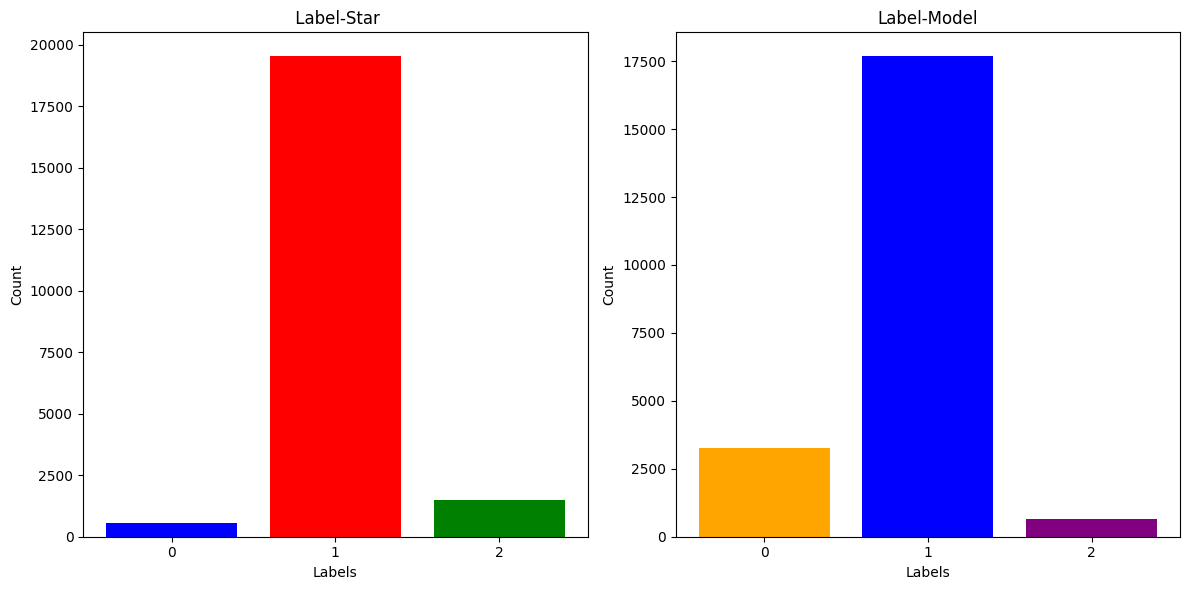

In [295]:
data=[a,b]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, ax in enumerate(axes):
    ax.bar(data[i].index, data[i].values, color=colors[i])
    ax.set_title(titles[i]) 
    ax.set_xticks(data[i].index)
    ax.set_xticklabels([int(idx) for idx in data[i].index])
    ax.set_xlabel("Labels")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


## wordcloud in columns label-model 

In [296]:
def plot_word_cloud(data, typ):
    re = " ".join(data['feedback'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(re)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} ', fontsize=15)
    plt.axis('off')
    plt.show()

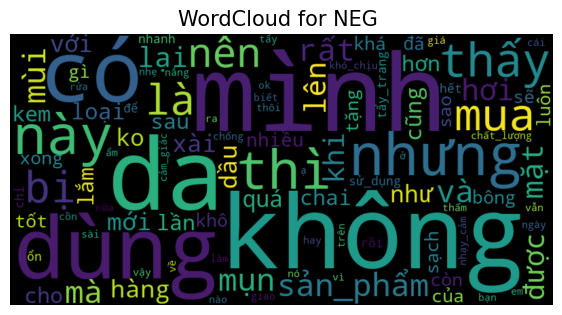

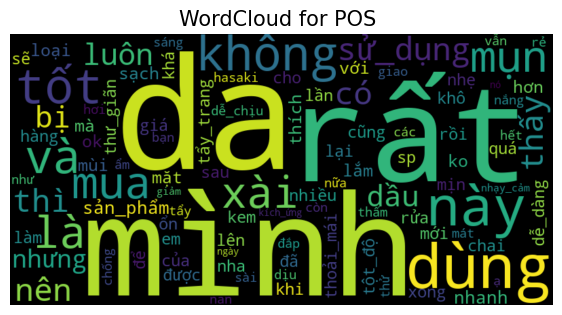

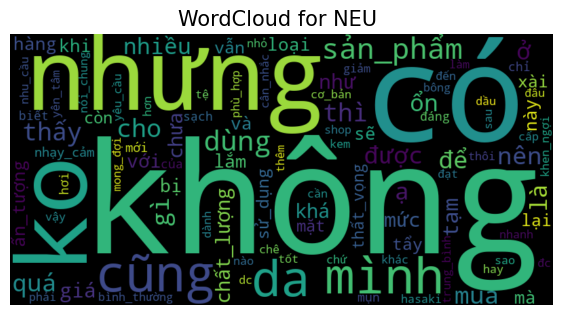

In [297]:
plot_word_cloud(df[df['label_model'] == 0], typ='NEG')
plot_word_cloud(df[df['label_model'] == 1], typ='POS')
plot_word_cloud(df[df['label_model'] == 2], typ='NEU')

In [298]:
def clean_text1(text):
    text = re.sub(emoji_pattern, " ", text) # remove emojis
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])\s*(\w)", r"\1 \2 \3", text)
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])", r"\1 \2", text)
    text = re.sub(f"([{string.punctuation}])([{string.punctuation}])+",r"\1", text) # reduce consecutive punctuation
    text = text.strip()
    while text.endswith(tuple(string.punctuation+string.whitespace)):
        text = text[:-1]
    while text.startswith(tuple(string.punctuation+string.whitespace)):
        text = text[1:]   
    text = text.translate(str.maketrans('', '', string.punctuation))
        
    text = re.sub(r"\s+", " ", text) 
    
    text = text_normalize(text) # make sure punctunation is in the right letter (Vietnamese case)
    text = word_tokenize(text, format="text") # tokenize the cleaned text
    return text

In [299]:
x='nhân viên cũng tốt, nhưng thiếu chuyên nghiệp'
y=clean_text1(x)

In [300]:
y

'nhân_viên cũng tốt nhưng thiếu chuyên_nghiệp'

In [301]:
predict_sentiment(y)

2

## visua top product have label NEG

In [305]:
df.head(1)

,id,id-customer,feedback,date,time,number-of-stars,id-product,label-star,label_model
0,1,443,sử_dụng dễ_dàng rất thoải_mái thư_giãn tột_độ,29/04/2023,17:06,5,308500015,1,1


In [360]:
a=df.query('label_model==0')[' id-product']

In [361]:
y=a.value_counts()[:5]

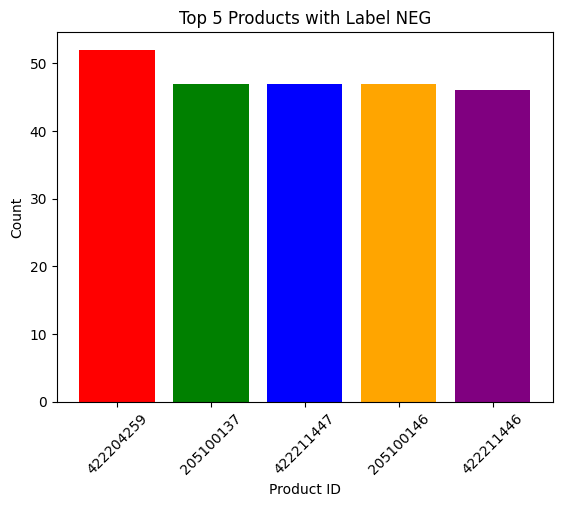

In [363]:
colors = ['red', 'green', 'blue', 'orange', 'purple','skyblue'] 
plt.bar(y.index.astype(str), y.values,color=colors)
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.title("Top 5 Products with Label NEG")
plt.xticks(rotation=45) 
plt.show()

## visua top product have label POS

In [364]:
a=df.query('label_model==1')[' id-product']

In [372]:
y=a.value_counts()[:5]
y

 id-product
308500018    244
308500015    243
308500037    243
422205160    243
308500009    243
Name: count, dtype: int64

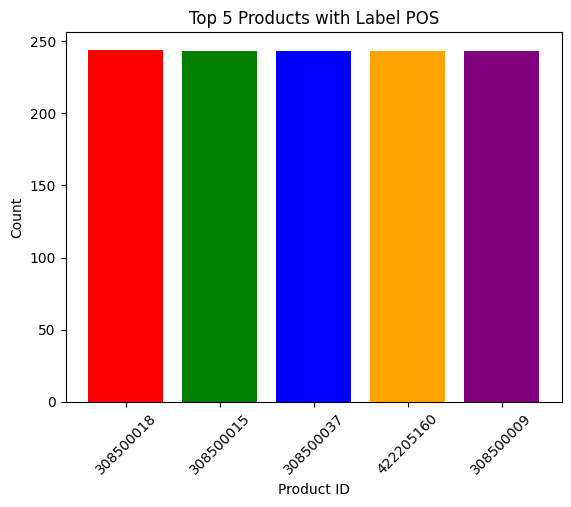

In [367]:
colors = ['red', 'green', 'blue', 'orange', 'purple','skyblue'] 
plt.bar(y.index.astype(str), y.values,color=colors)
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.title("Top 5 Products with Label POS")
plt.xticks(rotation=45) 
plt.show()

## visua top product have label NEU

In [373]:
a=df.query('label_model==2')[' id-product']

In [375]:
y=a.value_counts()[:10]
y

 id-product
422211446    13
422204259    13
205100136    13
422208807    12
422211447    11
205100146    11
205100137    11
422206648     9
200400004     9
204900013     7
Name: count, dtype: int64

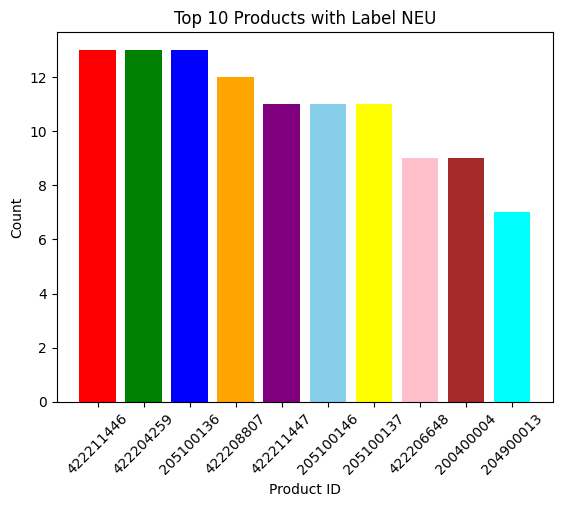

In [377]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'skyblue', 'yellow', 'pink', 'brown', 'cyan']  
plt.bar(y.index.astype(str), y.values,color=colors)
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.title("Top 10 Products with Label NEU")
plt.xticks(rotation=45) 
plt.show()

## visua top customer buy highest

In [380]:
a=df['id-customer'].value_counts()[:5]

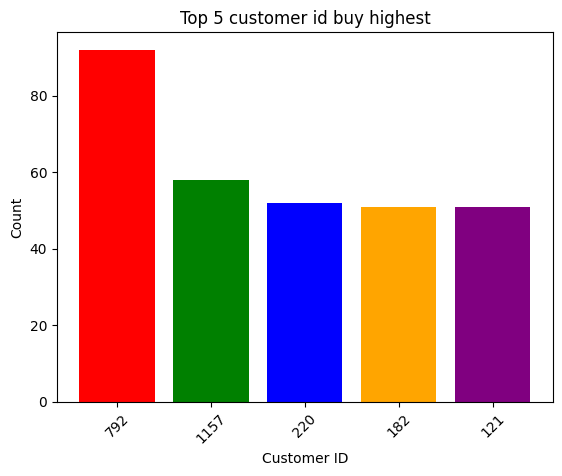

In [381]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'skyblue', 'yellow', 'pink', 'brown', 'cyan']  
plt.bar(a.index.astype(str), a.values,color=colors)
plt.xlabel("Customer ID")
plt.ylabel("Count")
plt.title("Top 5 customer id buy highest")
plt.xticks(rotation=45) 
plt.show()

## time feedback 

In [382]:
df.head(1)

,id,id-customer,feedback,date,time,number-of-stars,id-product,label-star,label_model
0,1,443,sử_dụng dễ_dàng rất thoải_mái thư_giãn tột_độ,29/04/2023,17:06,5,308500015,1,1


In [401]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')
feedback_per_day = df.groupby('date').size()

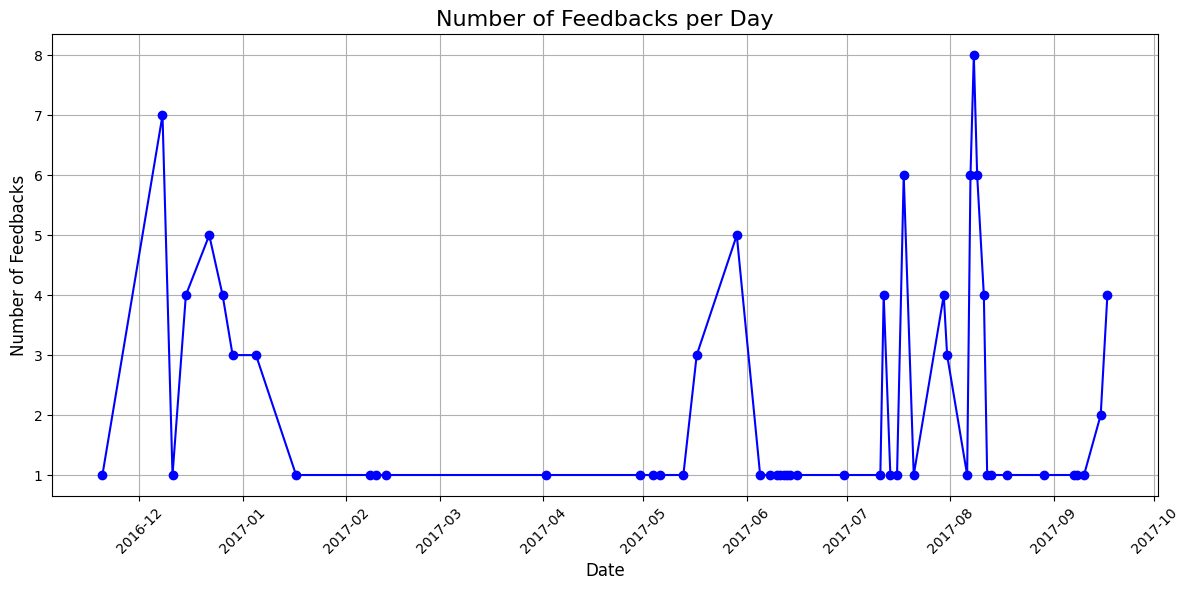

In [403]:
plt.figure(figsize=(12, 6))
plt.plot(feedback_per_day.index[:50], feedback_per_day.values[:50], marker='o', linestyle='-', color='blue')
plt.title("Number of Feedbacks per Day", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Feedbacks", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

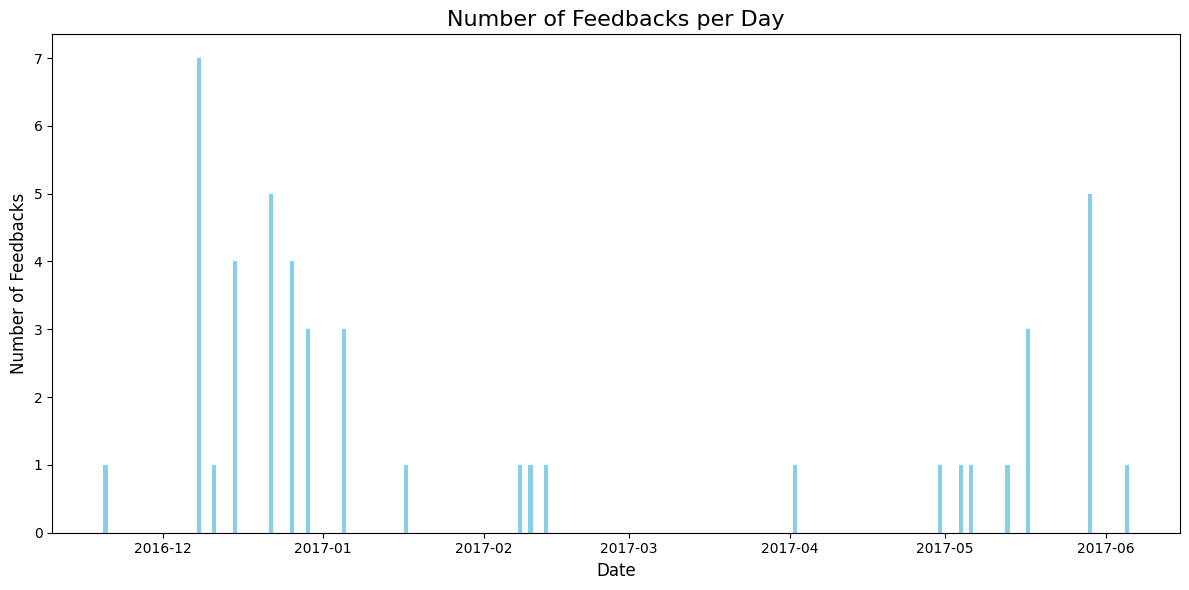

In [405]:
plt.figure(figsize=(12, 6))
plt.bar(feedback_per_day.index[:20], feedback_per_day.values[:20], color='skyblue')
plt.title("Number of Feedbacks per Day", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Feedbacks", fontsize=12)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()